In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tb=pd.read_excel('lab1.xlsx')
tb.rl=tb.rl/100
tb.dm=tb.dm/1000

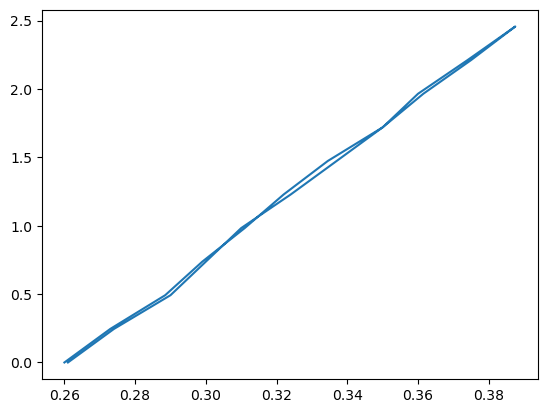

In [3]:
plt.plot(tb.rl,tb.dm)

In [4]:
ll=148.8/100
lth=176/100
r=13/1000
d=0.73/1e3
S=np.pi*d*d/4

def Ldist(dt,ll,lth,r):
    fi=np.atan((dt-dt[0])/ll)/2
    #print(fi,((dt-dt[0])/ll)/2)
    return r*np.sin(fi)

ep=Ldist(tb.rl,ll,lth,r)

In [5]:
0.1/26.1,r,d

(0.0038314176245210726, 0.013, 0.00073)

In [6]:
def getkb(X,Y):
    k=(np.average(Y*X)-np.average(Y)*np.average(X))/(np.average(X*X)-np.average(X)**2)
    b=np.average(Y)-k*np.average(X)
    def av(n):
        return np.average(n)
    sigk=np.sqrt((av(Y*Y)-av(Y)*av(Y))/(av(X*X)-av(X)**2) - k*k)/np.sqrt(X.shape[0])
    sigb=sigk*np.sqrt(av(X*X)-av(X)**2)
    return k,b,sigk,sigb

k,b,sigk,sigb=getkb(ep,tb.dm*9.81)
print(k,b,sigk,sigb)
print(sigk/k,sigb/b)

44097.8928841657 -0.26715168159785385 335.9451586417884 0.05573530261321194
0.007618168049984463 -0.20862793106842897


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


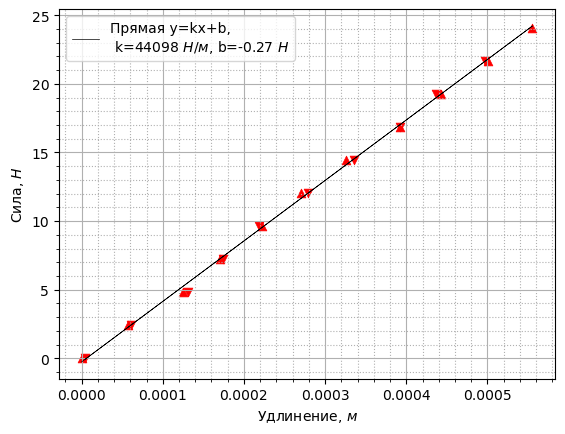

In [7]:
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

plt.scatter(ep[:ep.shape[0]//2+1],tb.dm[:ep.shape[0]//2+1]*9.81,40,'r', marker='^', linewidth=0.5)
plt.scatter(ep[ep.shape[0]//2+1:],tb.dm[ep.shape[0]//2+1:]*9.81,40,'r', marker='v', linewidth=0.5)
plt.plot(ep,ep*k+b,'black',linewidth=0.5,label="Прямая y=kx+b,\n k={0:.0f} $H/м$, b={1:.2f} $Н$".format(k,b))

plt.legend()

plt.xlabel(r"Удлинение, $м$")
plt.ylabel(r"Сила, $Н$")

plt.savefig('imgs/firs.eps')

In [8]:
E=k*lth/S
E/1e9,sigk*lth/S/1e9

(np.float64(185.436364542921), np.float64(1.4126853876661527))

In [9]:
tb=pd.read_excel('lab2.xlsx')
tb.r1/=100
tb.r2/=100
T=tb.t/tb.n
def getI(tb):
    dr=2/100
    return (204.1*(tb.r1-dr)**2+202.5*(tb.r1+dr)**2+204.4*(tb.r2-dr)**2+204.9*(tb.r2+dr)**2)/1000
I=getI(tb)
T,I

(0    2.4340
 1    2.6812
 2    3.2820
 3    3.6500
 4    3.9424
 5    4.3064
 6    4.7984
 dtype: float64,
 0    0.002127
 1    0.002792
 2    0.004912
 3    0.006288
 4    0.007686
 5    0.009403
 6    0.012070
 dtype: float64)

1717.3517227646653 2.3659258241378147 8.893165429521448 0.029358476180279314
0.005178418207310995 0.012408874310748124


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


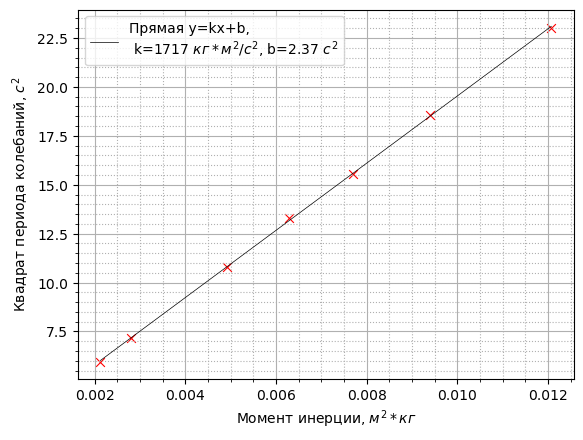

In [27]:
k,b,sigk,sigb=getkb(I,T**2)

print(k,b,sigk,sigb)
print(sigk/k,sigb/b)

plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

plt.scatter(I,T**2,40,'r', marker='x', linewidth=0.8)
plt.plot(I,I*k+b,'black',linewidth=0.5,label="Прямая y=kx+b,\n k={0:.0f} $кг*м^2/c^2$, b={1:.2f} $c^2$".format(k,b))

plt.legend()

plt.ylabel(r"Квадрат периода колебаний, $c^2$")
plt.xlabel(r"Момент инерции, $м^2*кг$")

plt.savefig('imgs/second.eps')

In [28]:
f=4*np.pi**2/k
f

np.float64(0.022987962850617116)

In [32]:
d=1.56/1000
r=d/2
lth=1734/1000

G=2*lth*f/(np.pi*r**4)
G/1e9, G*sigk/k/1e9, r

(np.float64(68.55691902285797), np.float64(0.35501639770511323), 0.00078)

In [31]:
8*lth*np.pi/(k*r**4)/1e9

np.float64(68.55691902285797)

In [13]:
tb=pd.read_excel('lab3.xlsx')
fi=tb.l/143.5
M=tb.m/1000*2*5.1/100*9.81

In [35]:
k,b,sigk,sigb=getkb(M,fi)

print(k,b,sigk,sigb)
print(sigk/k,sigb/b)

0.27230258912030136 -0.0016788461302801733 0.0019239843988171337 0.0002650568204299111
0.007065611843915047 -0.15788035344589751


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


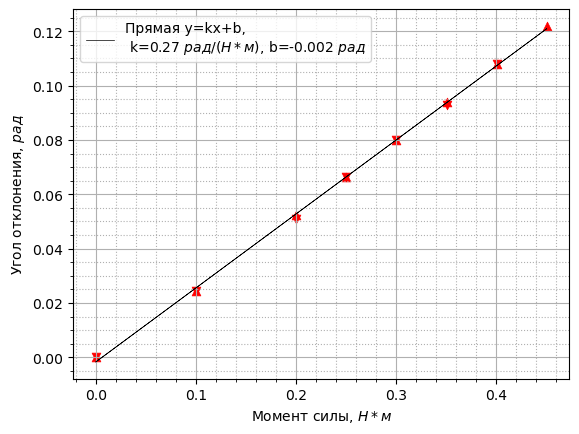

In [15]:
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

plt.scatter(M[:M.shape[0]//2+1],fi[:M.shape[0]//2+1],40,'r', marker='^', linewidth=0.5)
plt.scatter(M[M.shape[0]//2+1:],fi[M.shape[0]//2+1:],40,'r', marker='v', linewidth=0.5)
#plt.scatter(M,fi,40,'r', marker='x', linewidth=0.5)
plt.plot(M,M*k+b,'black',linewidth=0.5,label="Прямая y=kx+b,\n k={0:.2f} $рад/(Н*м)$, b={1:.3f} $рад$".format(k,b))

plt.legend()

plt.xlabel(r"Момент силы, $Н*м$")
plt.ylabel(r"Угол отклонения, $рад$")

plt.savefig('imgs/third.eps')

In [36]:
lth=132.8/100
r=0.5/2/100
G=2*lth/(np.pi*r**4)/k
G/1e9, G*sigk/k/1e9

(np.float64(79.48156184319075), np.float64(0.5615858647321148))

In [34]:
r

0.0025